# Artificial Intelligence (CSE3088)
## Topic: Tesla and Ferrari Stock Prediction
## Team:
- Shashank Singh 21MIA1110
- Dazzle A J 21MIA1119

## Random Forest

### Ferrari Dataset

In [2]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv("Ferrari.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,  random_state=42)
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],
'max_depth': np.arange(1, 15, 1),
'min_samples_split': [2, 10, 9],
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
'bootstrap': [True, False],
'random_state': [1, 2, 30, 42]
}
model= RandomForestRegressor()
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)
mse = metrics.mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, predict)
print("Root Mean Squared Error (RMSE):", rmse)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 42, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 13, 'bootstrap': False}
[ 56.62758157  72.88042962 111.78235661 189.09673186 151.17918799
 162.2698782   51.13286179 120.53667848 165.63240119  85.45969489
  41.02617822 187.84913809  62.98510122 100.99209102 215.46077727
 192.55462592 166.57255499 128.01621565 203.65900883 210.53174342
 217.9968082  219.0309762  109.89544335 131.50317707  40.81360615
 127.55605053  49.37306101 201.49111059 184.83769391 107.8634759
 202.17619392  48.1038645  106.688118   249.91959186 224.16078694
 117.04164482 113.75755607 188.86703329 176.53849299 158.3994743
 141.42287249 191.70556865 202.91014028 163.70555047 263.04465132
 122.41509063 125.5902374  170.34537638 118.31246454 157.80255458
 261.94919143  46.26394516 194.49016088 169.24183662 175.42545106
 206.77231572  59.74287488 211.93799787 205.48981167 271.67863199
 109.69959392 181.180

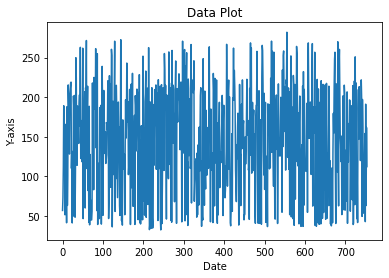

In [44]:
import matplotlib.pyplot as plt
plt.plot(predict,'-')
plt.xlabel('Date')
plt.ylabel('Y-axis')
plt.title('Data Plot')
plt.show()

### Tesla Dataset

In [45]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv("Tesla.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,  random_state=42)
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],
'max_depth': np.arange(1, 15, 1),
'min_samples_split': [2, 10, 9],
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
'bootstrap': [True, False],
'random_state': [1, 2, 30, 42]
}
model= RandomForestRegressor()
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)
mse = metrics.mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, predict)
print("Root Mean Squared Error (RMSE):", rmse)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 13, 'bootstrap': False}
[ 15.30611451  21.53479201  23.52188763 288.36761903  14.99315311
  28.10589957  12.25172758  22.13060874  43.10296329  23.90190563
  14.81482187 141.29942129  18.64334028  20.87880444 283.53886174
 125.58466936  54.88239853  18.43058775 142.1974255  219.22343077
 233.14571739 285.05995217  23.06021451  19.43156729  14.33679964
  20.10222339  13.63288532 179.61474358 228.31172855  22.92625914
 203.54179625  13.74541726  21.02301927 171.7505539  228.30384976
  22.32585956  22.75360949 242.50660336 130.1014244   14.87925328
  12.57825147 245.69749743 199.87515121  49.85491566 194.64524801
  20.17911009  23.4661845  215.24250077  18.94724679  14.84843916
 183.07956761  14.73300171 233.00692259  37.99033714 136.03864567
 283.5428257   16.96985286 194.71496543 290.71216792 184.49960238
  23.42563084 141.7

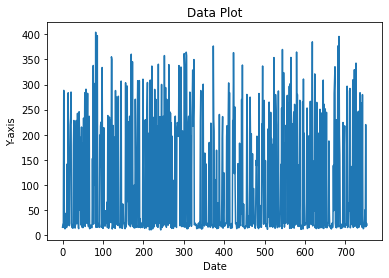

In [9]:
import matplotlib.pyplot as plt
plt.plot(predict,'-')
plt.xlabel('Date')
plt.ylabel('Y-axis')
plt.title('Data Plot')
plt.show()

## Support Vector Regression (SVR)

### Ferrari Dataset

In [29]:
df_axis=pd.read_csv("Ferrari.csv")
X = df_axis.drop(['Close', 'Date'], axis=1)
y = df_axis['Close']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 13.01611931362896


### Tesla Dataset

In [7]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

df_axis=pd.read_csv("Tesla.csv")
X = df_axis.drop(['Close', 'Date'], axis=1)
y = df_axis['Close']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 24.978606642344953


## SVR + Genetic Algorithm

### Ferrari Dataset

In [25]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Step 1: Define the SVR fitness function
def svr_fitness(chromosome):
    # Set SVR hyperparameters based on chromosome values
    kernel_type = ['linear', 'rbf', 'poly', 'sigmoid'][np.argmax(chromosome[0:4])]
    C = chromosome[4]
    epsilon = chromosome[5]
    gamma = chromosome[6]
    # Create and train the SVR model with the given hyperparameters
    model = SVR(kernel=kernel_type, C=C, epsilon=epsilon, gamma=gamma)
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate the mean squared error as the fitness score
    mse = mean_squared_error(y_test, y_pred)
    fitness = 1 / (mse + 1e-10)  # To avoid division by zero
    return fitness
# Step 2: Define chromosome representation
chromosome_length = 7  # Updated length to accommodate the kernel type
population_size = 50
mutation_rate = 0.1
generations = 50
# Step 3: Initialize the population
population = np.random.uniform(low=0, high=1, size=(population_size, chromosome_length))
# Step 4-9: Implement the genetic algorithm loop
for generation in range(generations):
    # Step 4: Evaluate fitness
    fitness_scores = [svr_fitness(chromosome) for chromosome in population]
    # Step 5: Selection
    selected_indices = np.argsort(fitness_scores)[-population_size // 2:]
    selected_population = population[selected_indices]
    # Flatten the selected_population array
    selected_population = selected_population.reshape(-1, chromosome_length)
    # Step 6: Crossover
    offspring_population = []
    for _ in range(population_size // 2):
        indices = np.random.choice(selected_population.shape[0], size=2, replace=False)
        parent1, parent2 = selected_population[indices]
        offspring = np.empty_like(parent1)
        crossover_point = np.random.randint(1, chromosome_length)
        offspring[:crossover_point] = parent1[:crossover_point]
        offspring[crossover_point:] = parent2[crossover_point:]
        offspring_population.append(offspring)
    # Step 7: Mutation
    for offspring in offspring_population:
        if np.random.random() < mutation_rate:
            mutation_point = np.random.randint(chromosome_length)
            offspring[mutation_point] = np.random.uniform(low=0, high=1)
    # Step 8: Update population
    population = np.concatenate((selected_population, offspring_population))
# Step 10: Retrieve the best chromosome
best_chromosome = population[np.argmax([svr_fitness(chromosome) for chromosome in population])]
# Step 11: Train the SVR model with optimized hyperparameters
best_kernel_type = ['linear', 'rbf', 'poly', 'sigmoid'][np.argmax(best_chromosome[0:4])]
best_C = best_chromosome[4]
best_epsilon = best_chromosome[5]
best_gamma = best_chromosome[6]
best_model = SVR(kernel=best_kernel_type, C=best_C, epsilon=best_epsilon, gamma=best_gamma)
best_model.fit(X_train_scaled, y_train)
# Step 12: Evaluate the performance
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.8044392153685628


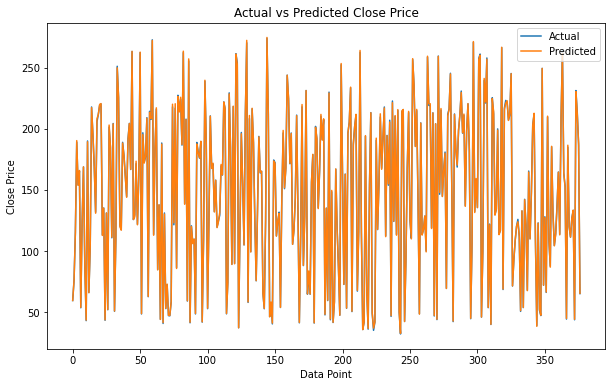

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

### Tesla Dataset

In [9]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Step 1: Define the SVR fitness function
def svr_fitness(chromosome):
    # Set SVR hyperparameters based on chromosome values
    kernel_type = ['linear', 'rbf', 'poly', 'sigmoid'][np.argmax(chromosome[0:4])]
    C = chromosome[4]
    epsilon = chromosome[5]
    gamma = chromosome[6]
    # Create and train the SVR model with the given hyperparameters
    model = SVR(kernel=kernel_type, C=C, epsilon=epsilon, gamma=gamma)
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate the mean squared error as the fitness score
    mse = mean_squared_error(y_test, y_pred)
    fitness = 1 / (mse + 1e-10)  # To avoid division by zero
    return fitness
# Step 2: Define chromosome representation
chromosome_length = 7  # Updated length to accommodate the kernel type
population_size = 50
mutation_rate = 0.1
generations = 50
# Step 3: Initialize the population
population = np.random.uniform(low=0, high=1, size=(population_size, chromosome_length))
# Step 4-9: Implement the genetic algorithm loop
for generation in range(generations):
    # Step 4: Evaluate fitness
    fitness_scores = [svr_fitness(chromosome) for chromosome in population]
    # Step 5: Selection
    selected_indices = np.argsort(fitness_scores)[-population_size // 2:]
    selected_population = population[selected_indices]
    # Flatten the selected_population array
    selected_population = selected_population.reshape(-1, chromosome_length)
    # Step 6: Crossover
    offspring_population = []
    for _ in range(population_size // 2):
        indices = np.random.choice(selected_population.shape[0], size=2, replace=False)
        parent1, parent2 = selected_population[indices]
        offspring = np.empty_like(parent1)
        crossover_point = np.random.randint(1, chromosome_length)
        offspring[:crossover_point] = parent1[:crossover_point]
        offspring[crossover_point:] = parent2[crossover_point:]
        offspring_population.append(offspring)
    # Step 7: Mutation
    for offspring in offspring_population:
        if np.random.random() < mutation_rate:
            mutation_point = np.random.randint(chromosome_length)
            offspring[mutation_point] = np.random.uniform(low=0, high=1)
    # Step 8: Update population
    population = np.concatenate((selected_population, offspring_population))
# Step 10: Retrieve the best chromosome
best_chromosome = population[np.argmax([svr_fitness(chromosome) for chromosome in population])]
# Step 11: Train the SVR model with optimized hyperparameters
best_kernel_type = ['linear', 'rbf', 'poly', 'sigmoid'][np.argmax(best_chromosome[0:4])]
best_C = best_chromosome[4]
best_epsilon = best_chromosome[5]
best_gamma = best_chromosome[6]
best_model = SVR(kernel=best_kernel_type, C=best_C, epsilon=best_epsilon, gamma=best_gamma)
best_model.fit(X_train_scaled, y_train)
# Step 12: Evaluate the performance
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.9523341571869695


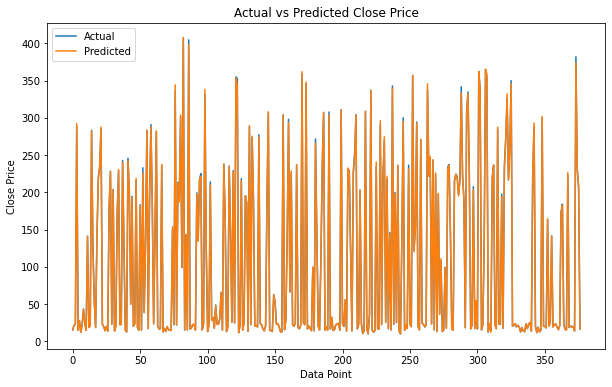

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

## Ant Colony Optimization + Random Forest

### Ferrari Dataset

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("Ferrari.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Define the Ant Colony Optimization (ACO) function
def aco_rf(x_train, y_train, num_ants, num_iterations):
    num_features = x_train.shape[1]  # Number of features
    pheromones = np.ones(num_features)  # Pheromone levels
    best_features = []  # List to store the best features for each iteration
    for iteration in range(num_iterations):
        ant_features = []  # List to store selected features by each ant
        # Ants select features based on pheromone levels
        for ant in range(num_ants):
            # Normalize pheromones to ensure they sum up to 1
            probabilities = pheromones / np.sum(pheromones)
            selected_features = np.random.choice(num_features, size=num_features, replace=False, p=probabilities)
            ant_features.append(selected_features)
        # Train and evaluate the Random Forest model with selected features
        rf_scores = []  # List to store the performance scores of each ant
        for ant in range(num_ants):
            selected_train_data = x_train[:, ant_features[ant]]
            selected_test_data = x_test[:, ant_features[ant]]
            rf = RandomForestRegressor()
            rf.fit(selected_train_data, y_train)
            y_pred = rf.predict(selected_test_data)
            mse = mean_squared_error(y_test, y_pred)
            rf_scores.append(mse)
        # Update pheromone levels based on performance scores
        best_ant = np.argmin(rf_scores)  # Find the best ant
        best_features.append(ant_features[best_ant])  # Store the best features
        pheromones *= 0.5  # Evaporate pheromones
        pheromones[best_features[-1]] += 1.0  # Reinforce pheromones on the best features
    return best_features[-1]
# Set ACO parameters
num_ants = 10
num_iterations = 100
# Run ACO to optimize Random Forest parameters
selected_features = aco_rf(x_train, y_train, num_ants, num_iterations)
# Train the Random Forest model with optimized features
selected_train_data = x_train[:, selected_features]
selected_test_data = x_test[:, selected_features]
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(selected_train_data, y_train)
# Evaluate the performance of the model
y_pred = model.predict(selected_test_data)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.35240394218227117


### Tesla Dataset

In [50]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv("Tesla.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Define the Ant Colony Optimization (ACO) function
def aco_rf(x_train, y_train, num_ants, num_iterations):
    num_features = x_train.shape[1]  # Number of features
    pheromones = np.ones(num_features)  # Pheromone levels
    best_features = []  # List to store the best features for each iteration
    for iteration in range(num_iterations):
        ant_features = []  # List to store selected features by each ant
        # Ants select features based on pheromone levels
        for ant in range(num_ants):
            # Normalize pheromones to ensure they sum up to 1
            probabilities = pheromones / np.sum(pheromones)
            selected_features = np.random.choice(num_features, size=num_features, replace=False, p=probabilities)
            ant_features.append(selected_features)
        # Train and evaluate the Random Forest model with selected features
        rf_scores = []  # List to store the performance scores of each ant
        for ant in range(num_ants):
            selected_train_data = x_train[:, ant_features[ant]]
            selected_test_data = x_test[:, ant_features[ant]]
            rf = RandomForestRegressor()
            rf.fit(selected_train_data, y_train)
            y_pred = rf.predict(selected_test_data)
            mse = mean_squared_error(y_test, y_pred)
            rf_scores.append(mse)
        # Update pheromone levels based on performance scores
        best_ant = np.argmin(rf_scores)  # Find the best ant
        best_features.append(ant_features[best_ant])  # Store the best features
        pheromones *= 0.5  # Evaporate pheromones
        pheromones[best_features[-1]] += 1.0  # Reinforce pheromones on the best features
    return best_features[-1]
# Set ACO parameters
num_ants = 10
num_iterations = 100
# Run ACO to optimize Random Forest parameters
selected_features = aco_rf(x_train, y_train, num_ants, num_iterations)
# Train the Random Forest model with optimized features
selected_train_data = x_train[:, selected_features]
selected_test_data = x_test[:, selected_features]
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(selected_train_data, y_train)
# Evaluate the performance of the model
y_pred = model.predict(selected_test_data)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.7243644349461951
